## 2. Airbnb Singapore

In [2]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline
from scipy import stats

### 2.1 Load and Explore the data

In [977]:
# Load the full dataset
dfa = pd.read_csv('listings.csv')

In [978]:
# Create a copy of the DataFrame
dfa_new = dfa.copy()

In [979]:
# Show overview of the dataset
dfa_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [980]:
dfa_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
latitude                          7907 non-null float64
longitude                         7907 non-null float64
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(3

In [981]:
print(dfa_new.describe())

                 id       host_id     latitude    longitude         price  \
count  7.907000e+03  7.907000e+03  7907.000000  7907.000000   7907.000000   
mean   2.338862e+07  9.114481e+07     1.314192   103.848787    169.332996   
std    1.016416e+07  8.190910e+07     0.030577     0.043675    340.187599   
min    4.909100e+04  2.366600e+04     1.243870   103.646560      0.000000   
25%    1.582180e+07  2.305808e+07     1.295795   103.835825     65.000000   
50%    2.470627e+07  6.344891e+07     1.311030   103.849410    124.000000   
75%    3.234850e+07  1.553811e+08     1.322110   103.872535    199.000000   
max    3.811276e+07  2.885676e+08     1.454590   103.973420  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     7907.000000        7907.000000        5149.000000   
mean        17.510054          12.807386           1.043669   
std         42.094616          29.707746           1.285851   
min          1.000000           0.000000           0.0

###### Numeric Data

In [982]:
# numeric data
dfa_num = dfa_new.select_dtypes(['int64', 'float64']).copy()
dfa_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,266763,1.44255,103.79580,83,180,1,0.01,2,365
1,50646,227796,1.33235,103.78521,81,90,18,0.28,1,365
2,56334,266763,1.44246,103.79667,69,6,20,0.20,2,365
3,71609,367042,1.34541,103.95712,206,1,14,0.15,9,353
4,71896,367042,1.34567,103.95963,94,1,22,0.22,9,355


In [983]:
dfa_num.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


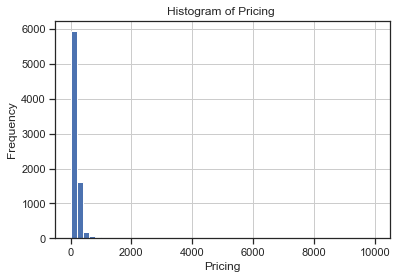

In [984]:
# Visualize Pricing
plt.hist(dfa_num['price'].dropna(), bins=50)
plt.xlabel('Pricing')
plt.ylabel('Frequency') 
plt.title('Histogram of Pricing ')
plt.grid(True)

plt.show()

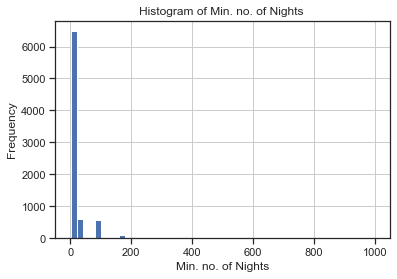

In [985]:
# Visualize Min. no. of Nights
plt.hist(dfa_num['minimum_nights'].dropna(), bins=50)
plt.xlabel('Min. no. of Nights')
plt.ylabel('Frequency') 
plt.title('Histogram of Min. no. of Nights ')
plt.grid(True)

plt.show()

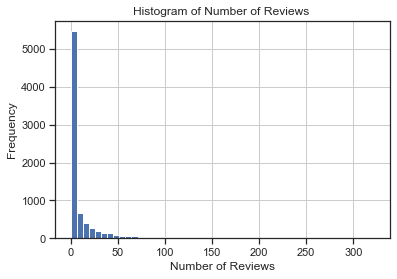

In [986]:
# Visualize Number of Reviews
plt.hist(dfa_num['number_of_reviews'].dropna(), bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency') 
plt.title('Histogram of Number of Reviews ')
plt.grid(True)

plt.show()

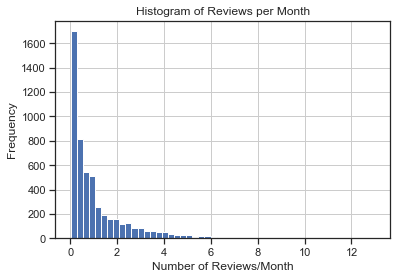

In [987]:
# Visualize Number of Rviews/Month
plt.hist(dfa_num['reviews_per_month'].dropna(), bins=50)
plt.xlabel('Number of Reviews/Month')
plt.ylabel('Frequency') 
plt.title('Histogram of Reviews per Month')
plt.grid(True)

plt.show()

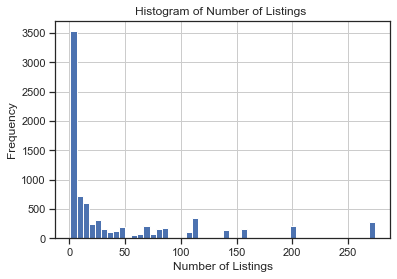

In [988]:
# Visualize Number of Listings
plt.hist(dfa_num['calculated_host_listings_count'].dropna(), bins=50)
plt.xlabel('Number of Listings')
plt.ylabel('Frequency') 
plt.title('Histogram of Number of Listings ')
plt.grid(True)

plt.show()

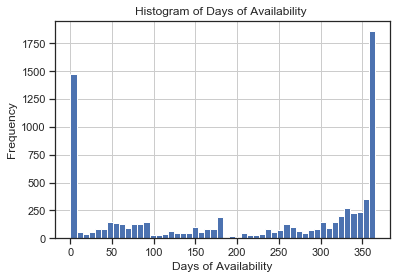

In [989]:
# Visualize availability_365
plt.hist(dfa_num['availability_365'].dropna(), bins=50)
plt.xlabel('Days of Availability')
plt.ylabel('Frequency') 
plt.title('Histogram of Days of Availability ')
plt.grid(True)

plt.show()

###### Categorical Data

In [990]:
# categorical data
dfa_cat = dfa_new.select_dtypes(['object']).copy()
dfa_cat.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,COZICOMFORT LONG TERM STAY ROOM 2,Francesca,North Region,Woodlands,Private room,2013-10-21
1,Pleasant Room along Bukit Timah,Sujatha,Central Region,Bukit Timah,Private room,2014-12-26
2,COZICOMFORT,Francesca,North Region,Woodlands,Private room,2015-10-01
3,Ensuite Room (Room 1 & 2) near EXPO,Belinda,East Region,Tampines,Private room,2019-08-11
4,B&B Room 1 near Airport & EXPO,Belinda,East Region,Tampines,Private room,2019-07-28


In [991]:
dfa_cat.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


In [992]:
dfa_cat.nunique()

name                   7457
host_name              1833
neighbourhood_group       5
neighbourhood            43
room_type                 3
last_review            1001
dtype: int64

In [993]:
dfa_cat['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

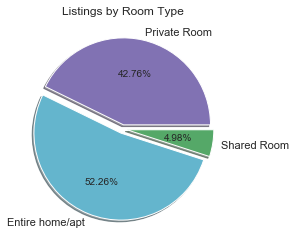

In [994]:
# Piechart of Room TYpe
dfa_private = dfa_new['room_type'].loc[dfa_new['room_type'] == 'Private room'].count()
dfa_entire = dfa_new['room_type'].loc[dfa_new['room_type'] == 'Entire home/apt'].count()
dfa_shared = dfa_new['room_type'].loc[dfa_new['room_type'] == 'Shared room'].count()

values = [dfa_private, dfa_entire, dfa_shared]
colors = ['m', 'c', 'g']
explode = [0.05, 0.05, 0.05] # specifies the fraction of the radius with which to offset each wedge
labels = ['Private Room', 'Entire home/apt', 'Shared Room']
plt.pie(values, colors= colors, labels=labels, shadow=True, explode = explode, autopct='%1.2f%%')
plt.title('Listings by Room Type')
plt.show()

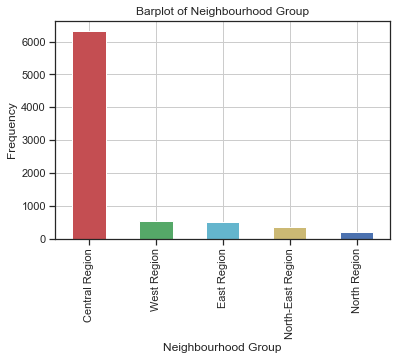

In [995]:
# visualize neighbourhood group
colors = ['r', 'g', 'c', 'y', 'b']
dfa_cat.neighbourhood_group.value_counts().plot.bar(color= colors) 
plt.xlabel('Neighbourhood Group')
plt.ylabel('Frequency') 
plt.title('Barplot of Neighbourhood Group')
plt.grid(True)
plt.show()

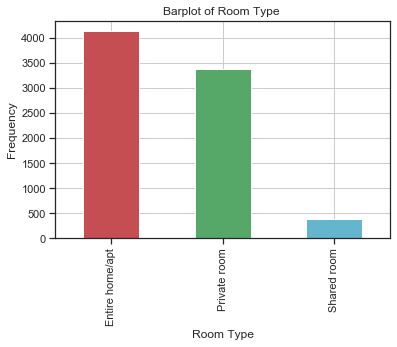

In [996]:
# visualize room type 
colors = ['r', 'g', 'c']
dfa_cat.room_type.value_counts().plot.bar(color= colors) 
plt.xlabel('Room Type')
plt.ylabel('Frequency') 
plt.title('Barplot of Room Type ')
plt.grid(True)
plt.show()

In [997]:
dfa_new['neighbourhood'].describe()

count        7907
unique         43
top       Kallang
freq         1043
Name: neighbourhood, dtype: object

###### Relationhip

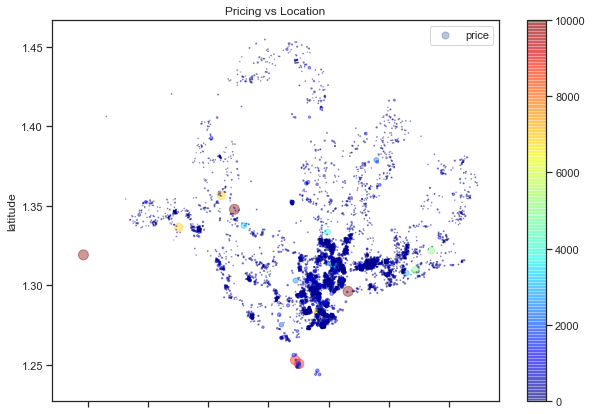

In [998]:
import matplotlib.pyplot as plt

dfa_new.plot(kind="scatter", x="longitude", y="latitude",
    s=dfa_new['price']/100, label="price",
    c=dfa_new['price'], cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),
)

plt.xlabel('longitude')
plt.ylabel('latitude') 
plt.title('Pricing vs Location')
plt.legend()
plt.show()

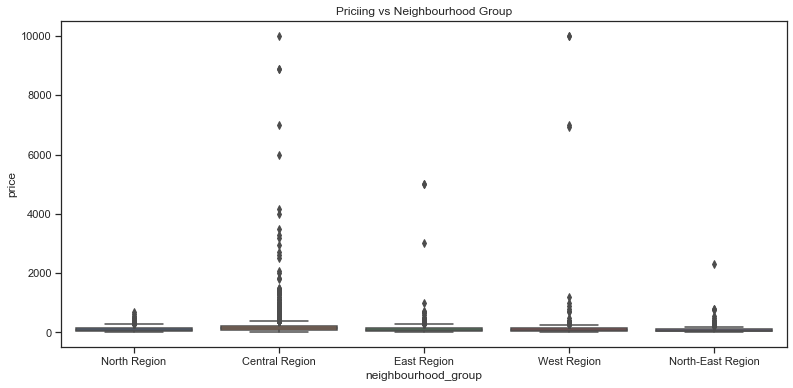

In [999]:
# Priciing vs Neighbourhood Group
plt.figure(figsize=(13,6))
sns.boxplot(y='price', x='neighbourhood_group', data=dfa_new) 
plt.title('Priciing vs Neighbourhood Group')
plt.show()

Text(0.5, 1.0, 'No. of listings vs Price')

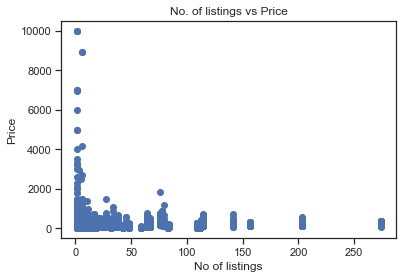

In [1000]:
# No. of listings vs Price
plt.scatter(dfa_new['calculated_host_listings_count'], dfa_new['price']) #plt.scatter(x, y)
plt.xlabel('No of listings') 
plt.ylabel('Price')
plt.title('No. of listings vs Price')

Text(0.5, 1.0, 'Priciing vs Room type of Neighbourhood Group')

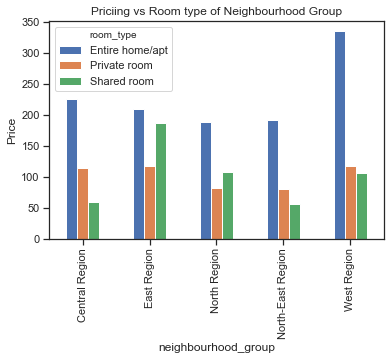

In [1001]:
# Price met per neighbourhood for each room type
dfa_new.groupby(['room_type','neighbourhood_group']).price.mean().unstack(0).plot.bar()
plt.ylabel('Price')
plt.title('Priciing vs Room type of Neighbourhood Group')

### 2.2 Cleanse and Transform the data

#### (i) Removing NULL values

In [1002]:
#identifying NULL values of each column
dfa_new.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

It only makes sense that there is no last review date (last_review) if the number of reviews given to an Airbnb listing is 0.

In [1003]:
# Reviws per month Column: fill in null values by median value of reviews_per_month Column
dfa_new['reviews_per_month'] = dfa_new['reviews_per_month'].fillna(dfa_new['reviews_per_month'].median())
dfa_new['reviews_per_month'] = dfa_new['reviews_per_month'].astype(float)
dfa_new.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [1004]:
# Last Date Review Column: fill in null values by mode 

last_review_mode = dfa_new['last_review'].mode()
print("Mode of last_review: "+str(last_review_mode))

Mode of last_review: 0    2019-08-12
dtype: object


In [1005]:
dfa_new['last_review'] = dfa_new['last_review'].fillna('2019-08-12').astype(object)
dfa_new.isnull().sum()

id                                0
name                              2
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [1006]:
# Name Column: fill in null values by mode 

name_mode = dfa_new['name'].mode()
print("Mode of name: "+str(name_mode))

Mode of name: 0    Luxury hostel with in-cabin locker - Single mixed
dtype: object


In [1007]:
dfa_new['name'] = dfa_new['name'].fillna('Luxury hostel with in-cabin locker - Single mixed').astype(object)
dfa_new.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### (ii) Outliers

###### Identifying outliers (number of listings)

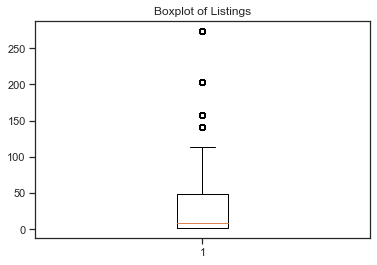

In [1008]:
# Boxplot (before treatment)
plt.boxplot(dfa_new['calculated_host_listings_count'].dropna())
plt.title('Boxplot of Listings')

plt.show()

In [1009]:
dfa_new['calculated_host_listings_count'].describe()

count    7907.000000
mean       40.607689
std        65.135253
min         1.000000
25%         2.000000
50%         9.000000
75%        48.000000
max       274.000000
Name: calculated_host_listings_count, dtype: float64

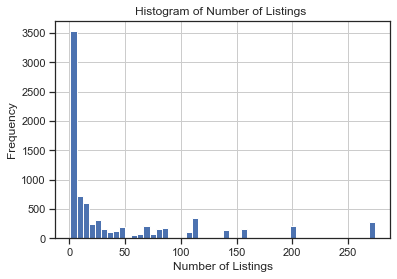

In [1010]:
# Histogram (before treatment)
plt.hist(dfa_new['calculated_host_listings_count'].dropna(), bins=50)
plt.xlabel('Number of Listings')
plt.ylabel('Frequency') 
plt.title('Histogram of Number of Listings ')
plt.grid(True)

plt.show()

In [1011]:
#Count the number of outliers (before cleaning)

Q1 = dfa_new['calculated_host_listings_count'].quantile(0.25)
Q3 = dfa_new['calculated_host_listings_count'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))


total_listings = len(dfa_new['calculated_host_listings_count'])
df_listings = dfa_new['calculated_host_listings_count'][(dfa_new['calculated_host_listings_count'] > Max_value) | (dfa_new['calculated_host_listings_count'] < Min_value)]
num_outliers = df_listings.count()
percentage_outliers_rpm = (num_outliers/total_listings)*100
print("% of Outliers in calculated_host_listings_count: {}%".format(round(percentage_outliers_rpm)))


Minimum value: -67.0
Maximum value: 117.0
% of Outliers in calculated_host_listings_count: 10.0%


###### Identifying outliers (reviews per month)

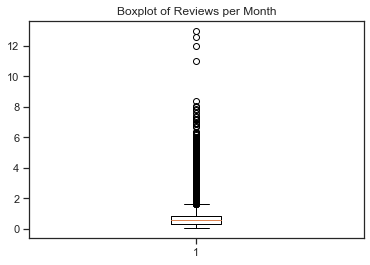

In [1012]:
# Boxplot (before treatment)
plt.boxplot(dfa_new['reviews_per_month'].dropna())
plt.title('Boxplot of Reviews per Month')

plt.show()

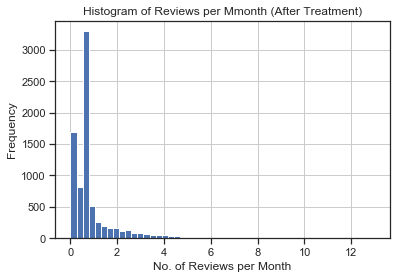

In [1013]:
# Histogram (Before Treatment)
plt.hist(dfa_new['reviews_per_month'].dropna(), bins=50)
plt.xlabel('No. of Reviews per Month')
plt.ylabel('Frequency') 
plt.title('Histogram of Reviews per Mmonth (After Treatment)')
plt.grid(True)

plt.show()

In [1014]:
dfa_new['reviews_per_month'].describe()

count    7907.000000
mean        0.871475
std         1.063948
min         0.010000
25%         0.330000
50%         0.550000
75%         0.850000
max        13.000000
Name: reviews_per_month, dtype: float64

In [1015]:
#Count the number of outliers (before cleaning)

Q1 = dfa_new['reviews_per_month'].quantile(0.25)
Q3 = dfa_new['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))


total_reviews_per_month = len(dfa_new['reviews_per_month'])
df_reviews = dfa_new['reviews_per_month'][(dfa_new['reviews_per_month'] > Max_value) | (dfa_new['reviews_per_month'] < Min_value)]
num_outliers = df_reviews.count()
percentage_outliers_rpm = (num_outliers/total_reviews_per_month)*100
print("% of Outliers in reviews_per_month: {}%".format(round(percentage_outliers_rpm)))


Minimum value: -0.0
Maximum value: 2.0
% of Outliers in reviews_per_month: 14.0%


###### Idntifying outliers (minimum_nights)

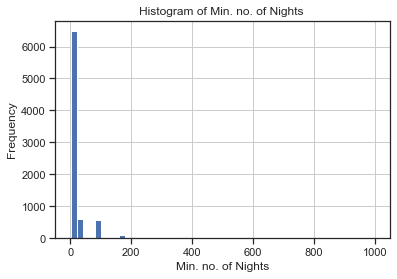

In [1016]:
# Visualize Min. no. of Nights (Before Treatment)
plt.hist(dfa_new['minimum_nights'].dropna(), bins=50)
plt.xlabel('Min. no. of Nights')
plt.ylabel('Frequency') 
plt.title('Histogram of Min. no. of Nights ')
plt.grid(True)

plt.show()

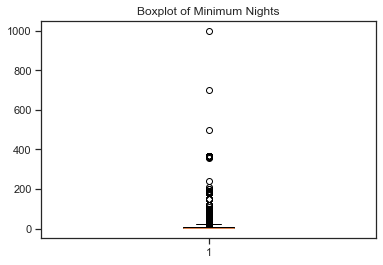

In [1017]:
# Boxplot (before treatment)
plt.boxplot(dfa_new['minimum_nights'].dropna())
plt.title('Boxplot of Minimum Nights')

plt.show()

In [1018]:
#Count the number of outliers (before cleaning)

Q1 = dfa_new['minimum_nights'].quantile(0.25)
Q3 = dfa_new['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))


total_minimum_nights = len(dfa_new['minimum_nights'])
df_reviews = dfa_new['minimum_nights'][(dfa_new['minimum_nights'] > Max_value) | (dfa_new['minimum_nights'] < Min_value)]
num_outliers = df_reviews.count()
percentage_outliers_rpm = (num_outliers/total_minimum_nights)*100
print("% of Outliers in minimum_nights: {}%".format(round(percentage_outliers_rpm)))


Minimum value: -12.0
Maximum value: 24.0
% of Outliers in minimum_nights: 18.0%


###### Treating outliers (minimum_nights)

No treatment

Method #1: Removal of outliers

In [1019]:
# Removal data above 3 sigma and below 3 sigma
#dfa_new['minimum_nights'] = dfa_new['minimum_nights'][(np.abs(stats.zscore(dfa_new['minimum_nights'])) < 3) & (np.abs(stats.zscore(dfa_new['minimum_nights'])) > -3)]

In [1020]:
#print("Number of null values in minimum_nights (before): "+str(dfa_new['minimum_nights'].isnull().sum()))
#dfa_new.dropna(subset=['minimum_nights'], inplace=True)
#print("Number of null values in minimum_nights (after): "+str(dfa_new['minimum_nights'].isnull().sum()))

In [1021]:
#Count the number of outliers (after cleaning)

#total_mn = len(dfa_new['minimum_nights'])
#df_mn = dfa_new['minimum_nights'][(np.abs(stats.zscore(dfa_new['minimum_nights'])) > 3) & (np.abs(stats.zscore(dfa_new['minimum_nights'])) < -3)]
#num_outliers = df_mn.count()

#percentage_outliers_mn = (num_outliers/total_mn)*100

#print("% of Outliers in minimum_nights: {}%".format(round(percentage_outliers_mn)))

In [1022]:
# Boxplot (After treatment)
#plt.boxplot(dfa_new['minimum_nights'])
#plt.title('Boxplot of Minimum Nights')

#plt.show()

In [1023]:
# Histogram (After Treatment)
#plt.hist(dfa_new['minimum_nights'], bins=50)
#plt.xlabel('Minimum Nights')
#plt.ylabel('Frequency') 
#plt.title('Histogram of Minimum Nights (After Treatment)')
#plt.grid(True)

#plt.show()

Method #2: Log Transform

In [1024]:
#dfa_new['log_minimum_nights'] = df_new['minimum_nights'].between(df_new['minimum_nights'].quantile(0), df_new['minimum_nights'].quantile(1))

#print('Skewness before transformation: '+str(df_new['minimum_nights'].skew()))
#print('Skewness after transformation: '+str(df_new['log_minimum_nights'].skew()))

In [1025]:
# Visualize Min. no. of Nights (After Treatment)
#plt.hist(dfa_new['log_minimum_nights'].dropna(), bins=10)
#plt.xlabel('Min. no. of Nights')
#plt.ylabel('Frequency') 
#plt.title('Histogram of Min. no. of Nights (After Treatment)')
#plt.grid(True)

#plt.show()

In [1026]:
# Boxplot (After treatment)
#plt.boxplot(dfa_new['log_minimum_nights'].dropna())
#plt.title('Boxplot of Minimum Nights')

#plt.show()

###### Idntifying outliers (price)

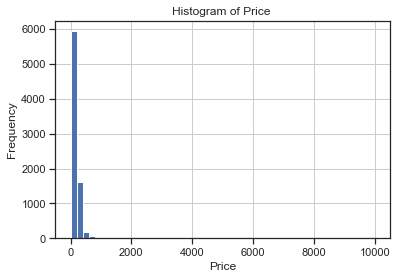

In [1027]:
# Visualize Price(Before Treatment)
plt.hist(dfa_new['price'].dropna(), bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Histogram of Price ')
plt.grid(True)

plt.show()

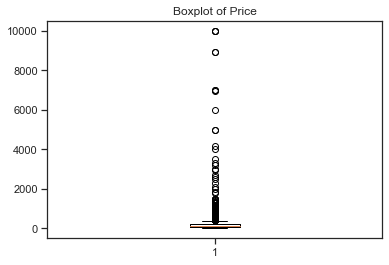

In [1028]:
# Boxplot (before treatment)
plt.boxplot(dfa_new['price'].dropna())
plt.title('Boxplot of Price')

plt.show()

In [1029]:
dfa_new['price'].describe()

count     7907.000000
mean       169.332996
std        340.187599
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64

In [1030]:
#Count the number of outliers (before cleaning)

Q1 = dfa_new['price'].quantile(0.25)
Q3 = dfa_new['price'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))


total_price = len(dfa_new['price'])
df_price = dfa_new['price'][(dfa_new['price'] > Max_value) | (dfa_new['price'] < Min_value)]
num_outliers = df_price.count()
percentage_outliers_rpm = (num_outliers/total_price)*100
print("% of Outliers in price: {}%".format(round(percentage_outliers_rpm)))


Minimum value: -136.0
Maximum value: 400.0
% of Outliers in price: 4.0%


###### Treating outliers (price)

In [1031]:
dfa_new = dfa_new[((dfa_new['price'] > Min_value) & (dfa_new['price'] < Max_value))]

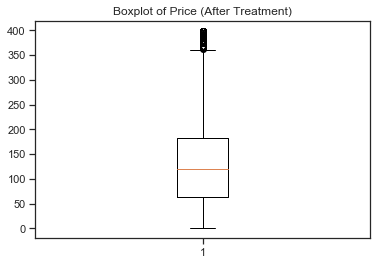

In [1032]:
# Boxplot (After Treatment)
plt.boxplot(dfa_new['price'])
plt.title('Boxplot of Price (After Treatment)')

plt.show()

In [2]:
# Histogram (After Treatment)
plt.hist(dfa_new['price'], bins=40, density=True)
plt.xlabel('Price')
plt.ylabel('Frequency') 
plt.title('Histogram of Price (After Treatment)')
plt.grid(True)

plt.show()

NameError: name 'plt' is not defined

In [1034]:
dfa_new['price'].describe()

count    7565.000000
mean      134.769332
std        85.224676
min         0.000000
25%        64.000000
50%       119.000000
75%       183.000000
max       399.000000
Name: price, dtype: float64

In [1035]:
#Count the number of outliers (after cleaning)

Q1 = dfa_new['price'].quantile(0.25)
Q3 = dfa_new['price'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))


total_price = len(dfa_new['price'])
df_price = dfa_new['price'][(dfa_new['price'] > Max_value) | (dfa_new['price'] < Min_value)]
num_outliers = df_price.count()
percentage_outliers_rpm = (num_outliers/total_price)*100
print("% of Outliers in price: {}%".format(round(percentage_outliers_rpm)))


Minimum value: -114.0
Maximum value: 362.0
% of Outliers in price: 1.0%


###### Identifying outliers (number of reviews)

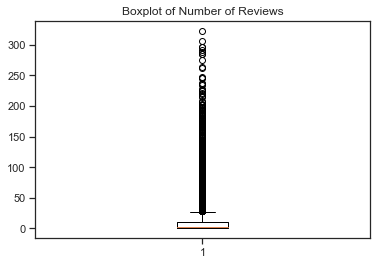

In [1036]:
# Boxplot (before treatment)
plt.boxplot(dfa_new['number_of_reviews'].dropna())
plt.title('Boxplot of Number of Reviews')

plt.show()

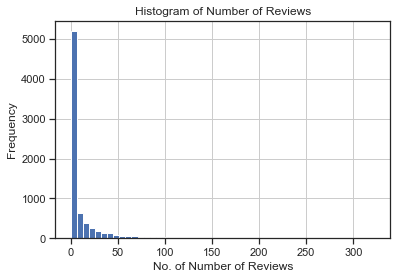

In [1037]:
# Histogram (Before Treatment)
plt.hist(dfa_new['number_of_reviews'].dropna(), bins=50)
plt.xlabel('No. of Number of Reviews')
plt.ylabel('Frequency') 
plt.title('Histogram of Number of Reviews')
plt.grid(True)

plt.show()

In [1038]:
dfa_new['number_of_reviews'].describe()

count    7565.000000
mean       13.005552
std        29.718599
min         0.000000
25%         0.000000
50%         2.000000
75%        11.000000
max       323.000000
Name: number_of_reviews, dtype: float64

In [1039]:
#Count the number of outliers (before cleaning)

Q1 = dfa_new['number_of_reviews'].quantile(0.25)
Q3 = dfa_new['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))

total_number_of_reviews = len(dfa_new['number_of_reviews'])
df_number_of_reviews = dfa_new['number_of_reviews'][(dfa_new['number_of_reviews'] > Max_value) | (dfa_new['number_of_reviews'] < Min_value)]
num_outliers = df_number_of_reviews.count()
percentage_outliers_rpm = (num_outliers/total_number_of_reviews)*100
print("% of Outliers in number_of_reviews: {}%".format(round(percentage_outliers_rpm)))

Minimum value: -16.0
Maximum value: 28.0
% of Outliers in number_of_reviews: 14.0%


###### Treating outliers (number of reviews)

No Treatment.

In [1040]:
# Removal data above 3 sigma and below 3 sigma
#dfa_new['number_of_reviews'] = dfa_new['number_of_reviews'][(np.abs(stats.zscore(dfa_new['number_of_reviews'])) < 3) & (np.abs(stats.zscore(dfa_new['number_of_reviews'])) > -3)]

In [1041]:
#print("Number of null values in number_of_reviews (before): "+str(dfa_new['number_of_reviews'].isnull().sum()))
#dfa_new.dropna(subset=['number_of_reviews'], inplace=True)
#print("Number of null values in number_of_reviews (after): "+str(dfa_new['number_of_reviews'].isnull().sum()))

In [1042]:
#Count the number of outliers (after cleaning)

#total_num_reviews = len(dfa_new['number_of_reviews'])
#df_num_reviews = dfa_new['number_of_reviews'][(np.abs(stats.zscore(dfa_new['number_of_reviews'])) > 3) & (np.abs(stats.zscore(dfa_new['number_of_reviews'])) < -3)]
#num_outliers = df_num_reviews.count()

#percentage_outliers_mn = (num_outliers/total_num_reviews)*100

#print("% of Outliers in number_of_reviews: {}%".format(round(percentage_outliers_mn)))

In [1043]:
# Boxplot (After Treatment)
#plt.boxplot(dfa_new['number_of_reviews'])
#plt.title('Boxplot of Number of Reviews (After Treatment)')

#plt.show()

In [1044]:
# Histogram (After Treatment)
#plt.hist(dfa_new['number_of_reviews'], bins=40)
#plt.xlabel('Number of Reviews')
#plt.ylabel('Frequency') 
#plt.title('Histogram of Number of Reviews (After Treatment)')
#plt.grid(True)

#plt.show()

###### Identifying outliers (number of days available in a year)

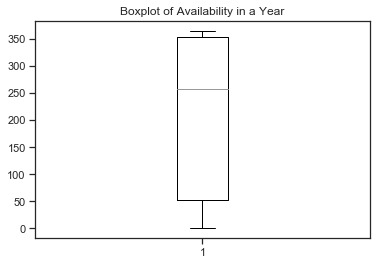

In [1045]:
# Boxplot (before treatment)
plt.boxplot(dfa_new['availability_365'].dropna())
plt.title('Boxplot of Availability in a Year')

plt.show()

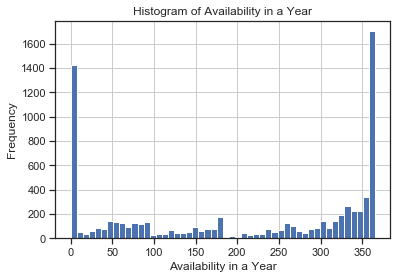

In [1046]:
# Histogram (Before Treatment)
plt.hist(dfa_new['availability_365'].dropna(), bins=50)
plt.xlabel('Availability in a Year')
plt.ylabel('Frequency') 
plt.title('Histogram of Availability in a Year')
plt.grid(True)

plt.show()

In [1047]:
dfa_new['availability_365'].describe()

count    7565.000000
mean      206.778453
std       146.147941
min         0.000000
25%        52.000000
50%       257.000000
75%       354.000000
max       365.000000
Name: availability_365, dtype: float64

In [1048]:
#Count the number of outliers (before cleaning)

Q1 = dfa_new['availability_365'].quantile(0.25)
Q3 = dfa_new['availability_365'].quantile(0.75)
IQR = Q3 - Q1
Min_value = Q1 - (IQR*1.5)
Max_value = Q3 + (IQR*1.5)
print("Minimum value: {}".format(round(Min_value)))
print("Maximum value: {}".format(round(Max_value)))

total_availability_365 = len(dfa_new['availability_365'])
df_availability_365 = dfa_new['availability_365'][(dfa_new['availability_365'] > Max_value) | (dfa_new['availability_365'] < Min_value)]
num_outliers = df_availability_365.count()
percentage_outliers_rpm = (num_outliers/total_availability_365)*100
print("% of Outliers in availability_365: {}%".format(round(percentage_outliers_rpm)))

Minimum value: -401.0
Maximum value: 807.0
% of Outliers in availability_365: 0.0%


#### (iii) Feature Engineering

###### Drop the irrelevant features/ columns

In [1049]:
dfa_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [1050]:
dfa_new = dfa_new.drop(['id', 'host_id', 'name', 'host_name', 'latitude', 'longitude'], axis = 1) 
dfa_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,North Region,Woodlands,Private room,83,180,1,2013-10-21,0.01,2,365
1,Central Region,Bukit Timah,Private room,81,90,18,2014-12-26,0.28,1,365
2,North Region,Woodlands,Private room,69,6,20,2015-10-01,0.20,2,365
3,East Region,Tampines,Private room,206,1,14,2019-08-11,0.15,9,353
4,East Region,Tampines,Private room,94,1,22,2019-07-28,0.22,9,355


###### (iv) Data Transformation

###### Encoding the Categorical Data Columns

In [1051]:
dfa_cat.describe()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,7905,7907,7907,7907,7907,5149
unique,7457,1833,5,43,3,1001
top,Luxury hostel with in-cabin locker - Single mixed,Jay,Central Region,Kallang,Entire home/apt,2019-08-12
freq,13,290,6309,1043,4132,152


1. Neighbourhood Group

In [1052]:
# View unique titles of neighbourhood_group
dfa_new['neighbourhood_group'].unique()

array(['North Region', 'Central Region', 'East Region', 'West Region',
       'North-East Region'], dtype=object)

In [1053]:
# Mapping
dfa_new['neighbourhood_group'] = dfa_new['neighbourhood_group'].map( {'West Region': 0, 'Central Region': 1, 'East Region': 2, 'North Region': 3, 'North-East Region': 4 } ).astype(int)
dfa_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3,Woodlands,Private room,83,180,1,2013-10-21,0.01,2,365
1,1,Bukit Timah,Private room,81,90,18,2014-12-26,0.28,1,365
2,3,Woodlands,Private room,69,6,20,2015-10-01,0.20,2,365
3,2,Tampines,Private room,206,1,14,2019-08-11,0.15,9,353
4,2,Tampines,Private room,94,1,22,2019-07-28,0.22,9,355


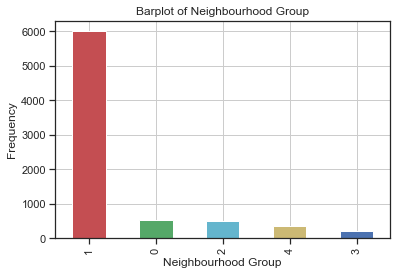

In [1054]:
# visualize neighbourhood group
colors = ['r', 'g', 'c', 'y', 'b']
dfa_new.neighbourhood_group.value_counts().plot.bar(color= colors) 
plt.xlabel('Neighbourhood Group')
plt.ylabel('Frequency') 
plt.title('Barplot of Neighbourhood Group')
plt.grid(True)
plt.show()

2. Neighbourhood 

Text(0, 0.5, 'Price')

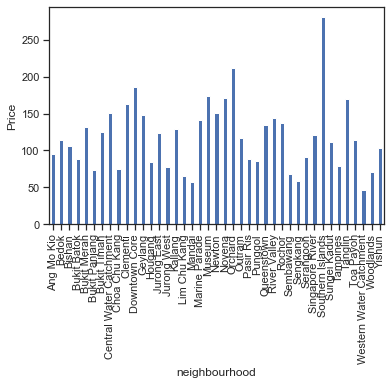

In [1055]:
dfa_new.groupby('neighbourhood').price.mean().plot.bar() 
plt.ylabel('Price')

In [1056]:
dfa_neighbourhood = dfa_new.groupby('neighbourhood').price.mean()
dfa_neighbourhood

neighbourhood
Ang Mo Kio                  95.614035
Bedok                      113.693370
Bishan                     106.134615
Bukit Batok                 88.206349
Bukit Merah                132.024123
Bukit Panjang               73.393939
Bukit Timah                125.234375
Central Water Catchment    151.000000
Choa Chu Kang               75.467742
Clementi                   162.495050
Downtown Core              186.242574
Geylang                    147.557513
Hougang                     84.625000
Jurong East                123.250000
Jurong West                 78.100000
Kallang                    128.653654
Lim Chu Kang                65.000000
Mandai                      56.666667
Marine Parade              140.644970
Museum                     174.078431
Newton                     150.419355
Novena                     171.512241
Orchard                    211.504587
Outram                     117.165948
Pasir Ris                   88.542857
Punggol                     85.74418

In [1057]:
dfa_neighbourhood.sort_values(ascending=True)

neighbourhood
Western Water Catchment     46.250000
Mandai                      56.666667
Sengkang                    58.461538
Lim Chu Kang                65.000000
Sembawang                   68.435897
Woodlands                   71.461538
Bukit Panjang               73.393939
Choa Chu Kang               75.467742
Jurong West                 78.100000
Tampines                    79.639344
Hougang                     84.625000
Punggol                     85.744186
Bukit Batok                 88.206349
Pasir Ris                   88.542857
Serangoon                   91.173913
Ang Mo Kio                  95.614035
Yishun                     102.823529
Bishan                     106.134615
Sungei Kadut               111.200000
Bedok                      113.693370
Toa Payoh                  114.770000
Outram                     117.165948
Singapore River            121.463087
Jurong East                123.250000
Bukit Timah                125.234375
Kallang                    128.65365

In [1058]:
dfa_new['neighbourhood'] = dfa_new['neighbourhood'].map(dfa_neighbourhood)

In [1059]:
# Mapping 
from sklearn.preprocessing import OrdinalEncoder

# Map neighbour
ord_enc = OrdinalEncoder()
dfa_new["neighbourhood"] = ord_enc.fit_transform(dfa_new[["neighbourhood"]]).astype(int)

dfa_new["neighbourhood"].unique()

array([ 5, 24,  9, 19, 26, 32, 31, 30,  8, 28, 27, 14, 29, 13, 20, 21, 11,
       35, 10, 25, 36, 38,  6, 22, 39, 15, 12, 37,  7,  2, 34, 23,  4, 17,
       33, 16,  1, 18,  0, 40,  3], dtype=int64)

In [1060]:
# Mapping
dfa_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3,5,Private room,83,180,1,2013-10-21,0.01,2,365
1,1,24,Private room,81,90,18,2014-12-26,0.28,1,365
2,3,5,Private room,69,6,20,2015-10-01,0.20,2,365
3,2,9,Private room,206,1,14,2019-08-11,0.15,9,353
4,2,9,Private room,94,1,22,2019-07-28,0.22,9,355


In [1061]:
# (0.0063 is correlation value of neighbourhood)

(iii) Room Type

In [1062]:
# View unique titles of room_type
dfa_new['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [1063]:
# Mapping
dfa_new['room_type'] = dfa_new['room_type'].map( {'Private room': 0, 'Entire home/apt': 1, 'Shared room': 2 } ).astype(int)
dfa_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3,5,0,83,180,1,2013-10-21,0.01,2,365
1,1,24,0,81,90,18,2014-12-26,0.28,1,365
2,3,5,0,69,6,20,2015-10-01,0.20,2,365
3,2,9,0,206,1,14,2019-08-11,0.15,9,353
4,2,9,0,94,1,22,2019-07-28,0.22,9,355


(iv) Last Review

In [1064]:
# Create features for year, month, day, hour, and minute 
dfa_new['last_review'] = pd.to_datetime(dfa_new['last_review'], errors='coerce')
dfa_new['year'] = dfa_new['last_review'].dt.year.values.astype(int)
dfa_new['month'] = dfa_new['last_review'].dt.month.values.astype(int)
dfa_new['day'] = dfa_new['last_review'].dt.day.values.astype(int)

In [1065]:
dfa_new.drop('last_review', axis='columns', inplace=True)

In [1066]:
dfa_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,3,5,0,83,180,1,0.01,2,365,2013,10,21
1,1,24,0,81,90,18,0.28,1,365,2014,12,26
2,3,5,0,69,6,20,0.20,2,365,2015,10,1
3,2,9,0,206,1,14,0.15,9,353,2019,8,11
4,2,9,0,94,1,22,0.22,9,355,2019,7,28


###### Transferring the Numeric Data Columns

(i) Listings

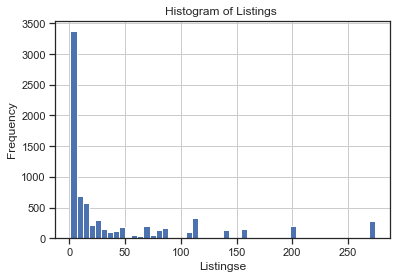

In [1067]:
# Listings  (before normalisation)
plt.hist(dfa_new['calculated_host_listings_count'], bins=50)
plt.xlabel('Listingse')
plt.ylabel('Frequency') 
plt.title('Histogram of Listings ')
plt.grid(True)

plt.show()

In [1068]:
dfa_new['calculated_host_listings_count'].describe()

count    7565.000000
mean       41.169200
std        66.050711
min         1.000000
25%         2.000000
50%         9.000000
75%        48.000000
max       274.000000
Name: calculated_host_listings_count, dtype: float64

In [1069]:
# calculated_host_listings_count values are NOT evenly distributed
# Bin / Group Fare values using Quantile Range

#when calculated_host_listings_count <= 2, make value in calculated_host_listings_count column = 0
dfa_new.loc[dfa_new['calculated_host_listings_count'] <= 2.000000, 'calculated_host_listings_count'] = 0 

#when calculated_host_listings_count > 2 & <= 9, make value in calculated_host_listings_count column = 1
dfa_new.loc[(dfa_new['calculated_host_listings_count'] > 1.000000) & (dfa_new['calculated_host_listings_count'] <= 9.000000), 'calculated_host_listings_count'] = 1

#when calculated_host_listings_count > 9 & <= 48, make value in calculated_host_listings_count column = 2
dfa_new.loc[(dfa_new['calculated_host_listings_count'] > 9.000000) & (dfa_new['calculated_host_listings_count'] <= 48.000000), 'calculated_host_listings_count']   = 2

#when calculated_host_listings_count > 48, make value in calculated_host_listings_count column = 3
dfa_new.loc[dfa_new['calculated_host_listings_count'] > 48.000000, 'calculated_host_listings_count'] = 3

#Converting all values in "calculated_host_listings_count" column to integer
dfa_new['calculated_host_listings_count'] = dfa_new['calculated_host_listings_count'].astype(int)
dfa_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,3,5,0,83,180,1,0.01,0,365,2013,10,21
1,1,24,0,81,90,18,0.28,0,365,2014,12,26
2,3,5,0,69,6,20,0.20,0,365,2015,10,1
3,2,9,0,206,1,14,0.15,1,353,2019,8,11
4,2,9,0,94,1,22,0.22,1,355,2019,7,28


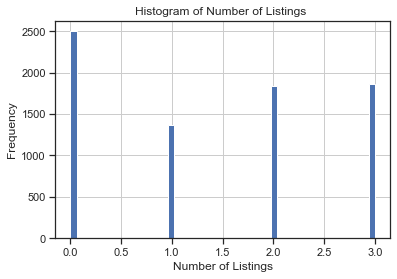

In [1070]:
# Listings  (after normalisation)
plt.hist(dfa_new['calculated_host_listings_count'].dropna(), bins=50)
plt.xlabel('Number of Listings')
plt.ylabel('Frequency') 
plt.title('Histogram of Number of Listings ')
plt.grid(True)

plt.show()

(ii) Reviews per month

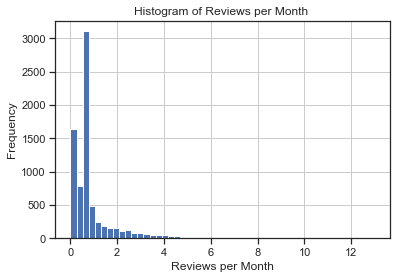

In [1071]:
# reviews_per_month  (before normalisation)
plt.hist(dfa_new['reviews_per_month'], bins=50)
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency') 
plt.title('Histogram of Reviews per Month ')
plt.grid(True)

plt.show()

In [1072]:
dfa_new['reviews_per_month'].describe()

count    7565.000000
mean        0.870674
std         1.056362
min         0.010000
25%         0.330000
50%         0.550000
75%         0.870000
max        13.000000
Name: reviews_per_month, dtype: float64

In [1073]:
# Min-Max normalization for reviews_per_month column
dfa_new["reviews_per_month"] = (dfa_new["reviews_per_month"] - dfa_new["reviews_per_month"].min()) / (dfa_new["reviews_per_month"].max()-dfa_new["reviews_per_month"].min())
dfa_new.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
count,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000
mean,1.180833,25.989954,0.613087,134.769332,17.776206,13.005552,0.066257,1.404098,206.778453,2018.680370,7.148579,14.499405
std,0.779549,8.253128,0.582726,85.224676,41.962469,29.718599,0.081321,1.180535,146.147941,0.788026,2.124901,7.425990
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,1.000000,21.000000,0.000000,64.000000,1.000000,0.000000,0.024634,0.000000,52.000000,2019.000000,7.000000,12.000000
50%,1.000000,27.000000,1.000000,119.000000,3.000000,2.000000,0.041570,1.000000,257.000000,2019.000000,8.000000,12.000000
75%,1.000000,31.000000,1.000000,183.000000,10.000000,11.000000,0.066205,2.000000,354.000000,2019.000000,8.000000,19.000000
max,4.000000,40.000000,2.000000,399.000000,1000.000000,323.000000,1.000000,3.000000,365.000000,2019.000000,12.000000,31.000000


In [1074]:
dfa_new['reviews_per_month'].describe()

count    7565.000000
mean        0.066257
std         0.081321
min         0.000000
25%         0.024634
50%         0.041570
75%         0.066205
max         1.000000
Name: reviews_per_month, dtype: float64

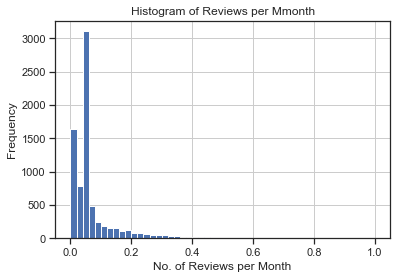

In [1075]:
# Histogram (After Treatment)
plt.hist(dfa_new['reviews_per_month'].dropna(), bins=50)
plt.xlabel('No. of Reviews per Month')
plt.ylabel('Frequency') 
plt.title('Histogram of Reviews per Mmonth')
plt.grid(True)

plt.show()

(iii) Mininmum Nights

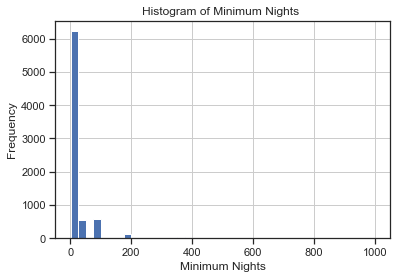

In [1076]:
# Histogram (Before normalisation)
plt.hist(dfa_new['minimum_nights'].dropna(), bins=40)
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency') 
plt.title('Histogram of Minimum Nights ')
plt.grid(True)

plt.show()

In [1077]:
dfa_new['minimum_nights'].describe()

count    7565.000000
mean       17.776206
std        41.962469
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max      1000.000000
Name: minimum_nights, dtype: float64

In [1078]:
# Min-Max normalization for AGE column
dfa_new["minimum_nights"] = (dfa_new["minimum_nights"] - dfa_new["minimum_nights"].min()) / (dfa_new["minimum_nights"].max()-dfa_new["minimum_nights"].min())
dfa_new.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
count,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000
mean,1.180833,25.989954,0.613087,134.769332,0.016793,13.005552,0.066257,1.404098,206.778453,2018.680370,7.148579,14.499405
std,0.779549,8.253128,0.582726,85.224676,0.042004,29.718599,0.081321,1.180535,146.147941,0.788026,2.124901,7.425990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,1.000000,21.000000,0.000000,64.000000,0.000000,0.000000,0.024634,0.000000,52.000000,2019.000000,7.000000,12.000000
50%,1.000000,27.000000,1.000000,119.000000,0.002002,2.000000,0.041570,1.000000,257.000000,2019.000000,8.000000,12.000000
75%,1.000000,31.000000,1.000000,183.000000,0.009009,11.000000,0.066205,2.000000,354.000000,2019.000000,8.000000,19.000000
max,4.000000,40.000000,2.000000,399.000000,1.000000,323.000000,1.000000,3.000000,365.000000,2019.000000,12.000000,31.000000


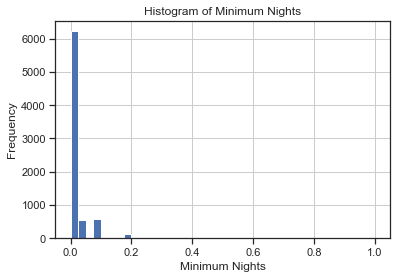

In [1079]:
# Histogram (After normalisation)
plt.hist(dfa_new['minimum_nights'].dropna(), bins=40)
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency') 
plt.title('Histogram of Minimum Nights')
plt.grid(True)

plt.show()

In [1080]:
#Count the number of outliers (after cleaning)

total_rpm = len(dfa_new['minimum_nights'])
df_mn = dfa_new['minimum_nights'][(np.abs(stats.zscore(dfa_new['minimum_nights'])) > 3)]
num_outliers = df_mn.count()

percentage_outliers_mn = (num_outliers/total_rpm)*100

print("% of Outliers in minimum_nights: {}%".format(round(percentage_outliers_mn)))

% of Outliers in minimum_nights: 2.0%


(iv) Number of Reviews

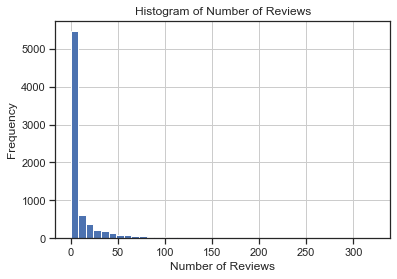

In [1081]:
# Histogram (Before normalisation)
plt.hist(dfa_new['number_of_reviews'].dropna(), bins=40)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency') 
plt.title('Histogram of Number of Reviews')
plt.grid(True)

plt.show()

In [1082]:
dfa_new['number_of_reviews'].describe()

count    7565.000000
mean       13.005552
std        29.718599
min         0.000000
25%         0.000000
50%         2.000000
75%        11.000000
max       323.000000
Name: number_of_reviews, dtype: float64

In [1083]:
# number_of_reviews values are NOT evenly distributed
# Bin / Group Fare values using Quantile Range

#when number_of_reviews <= 1, make value in number_of_reviews column = 0
dfa_new.loc[dfa_new['number_of_reviews'] <= 1.000000, 'number_of_reviews'] = 0 

#when number_of_reviews > 1 & <= 3, make value in number_of_reviews column = 1
dfa_new.loc[(dfa_new['number_of_reviews'] > 1.000000) & (dfa_new['number_of_reviews'] <= 3.000000), 'number_of_reviews'] = 1

#when number_of_reviews > 14.454 & <= 31, make value in number_of_reviews column = 2
dfa_new.loc[(dfa_new['number_of_reviews'] > 3.000000) & (dfa_new['number_of_reviews'] <= 10.000000), 'number_of_reviews']   = 2

#when number_of_reviews > 31, make value in number_of_reviews column = 3
dfa_new.loc[dfa_new['number_of_reviews'] > 10.000000, 'number_of_reviews'] = 3

#Converting all values in "number_of_reviews" column to integer
dfa_new['number_of_reviews'] = dfa_new['number_of_reviews'].dropna().astype(int)
dfa_new.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,3,5,0,83,0.179179,0,0.000000,0,365,2013,10,21
1,1,24,0,81,0.089089,3,0.020785,0,365,2014,12,26
2,3,5,0,69,0.005005,3,0.014627,0,365,2015,10,1
3,2,9,0,206,0.000000,3,0.010778,1,353,2019,8,11
4,2,9,0,94,0.000000,3,0.016166,1,355,2019,7,28


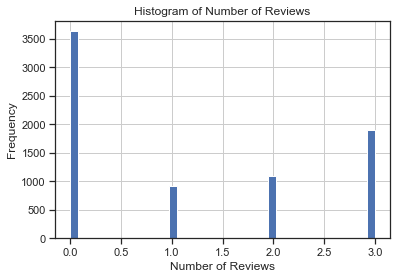

In [1084]:
# Histogram (After normalisation)
plt.hist(dfa_new['number_of_reviews'].dropna(), bins=40)
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency') 
plt.title('Histogram of Number of Reviews')
plt.grid(True)

plt.show()

### 2.3 Correlation Analysis

###### The relationship between data 

In [1085]:
dfa_new.describe()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
count,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000,7565.000000
mean,1.180833,25.989954,0.613087,134.769332,0.016793,1.167878,0.066257,1.404098,206.778453,2018.680370,7.148579,14.499405
std,0.779549,8.253128,0.582726,85.224676,0.042004,1.266603,0.081321,1.180535,146.147941,0.788026,2.124901,7.425990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,1.000000,21.000000,0.000000,64.000000,0.000000,0.000000,0.024634,0.000000,52.000000,2019.000000,7.000000,12.000000
50%,1.000000,27.000000,1.000000,119.000000,0.002002,1.000000,0.041570,1.000000,257.000000,2019.000000,8.000000,12.000000
75%,1.000000,31.000000,1.000000,183.000000,0.009009,3.000000,0.066205,2.000000,354.000000,2019.000000,8.000000,19.000000
max,4.000000,40.000000,2.000000,399.000000,1.000000,3.000000,1.000000,3.000000,365.000000,2019.000000,12.000000,31.000000


(i) Price vs minimum_nights

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Price vs Minimum Nights')

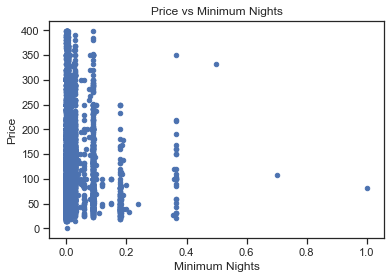

In [1086]:
# Price vs minimum_nights.

dfa_new.plot.scatter(x='minimum_nights',
                      y='price')
plt.xlabel('Minimum Nights') 
plt.ylabel('Price')
plt.title('Price vs Minimum Nights')

In [1087]:
# Correlation Value
column_1 = dfa_new['minimum_nights']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: -0.10769564313685898


If we disregard 0 minimum number of nights, I notice that an increase in the number of nights means a dip in the average pricing for an Airbnb stay. This makes sense as it acts as an encouragement for customers to stay longer.

(ii) Price vs reviews_per_month

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Price vs reviews_per_month')

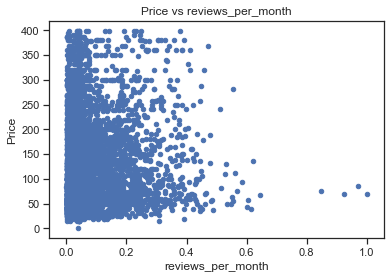

In [1088]:
# Price vs availability_365.

dfa_new.plot.scatter(x='reviews_per_month',
                      y='price')
plt.xlabel('reviews_per_month') 
plt.ylabel('Price')
plt.title('Price vs reviews_per_month')

In [1089]:
# Correlation Value
column_1 = dfa_new['reviews_per_month']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.023957399167480145


(iii) Price vs number_of_reviews

Text(0, 0.5, 'Price')

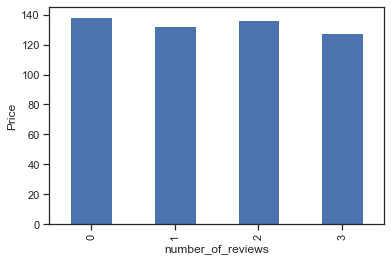

In [1090]:
# price vs. number_of_reviews.

dfa_new.groupby('number_of_reviews').price.mean().plot.bar() 
plt.ylabel('Price')

In [1091]:
# Correlation Value
column_1 = dfa_new['number_of_reviews']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: -0.04539124882523005


(iv) Price vs calculated_host_listings_count

Text(0, 0.5, 'Price')

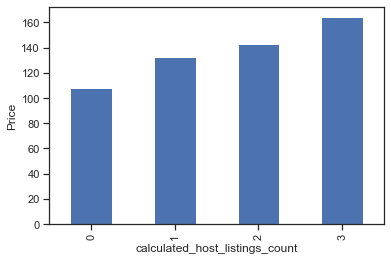

In [1092]:
# price vs. calculated_host_listings_count.

dfa_new.groupby('calculated_host_listings_count').price.mean().plot.bar() 
plt.ylabel('Price')

In [1093]:
# Correlation Value
column_1 = dfa_new['calculated_host_listings_count']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.2522604276193931


(v) Price vs neighbourhood_group

Text(0, 0.5, 'Price')

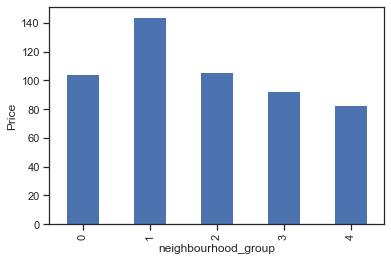

In [1094]:
# price vs. neighbourhood_group.

dfa_new.groupby('neighbourhood_group').price.mean().plot.bar() 
plt.ylabel('Price')

In [1095]:
# Correlation Value
column_1 = dfa_new['neighbourhood_group']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: -0.13386600760115952


(vi) Price vs neighbourhood

Text(0, 0.5, 'Price')

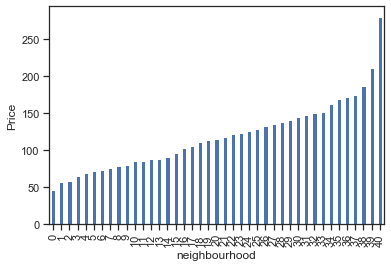

In [1096]:
# price vs. neighbourhood

dfa_new.groupby('neighbourhood').price.mean().plot.bar() 
plt.ylabel('Price')

In [1097]:
# Correlation Value
column_1 = dfa_new['neighbourhood']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.33444770861533407


(vii) Price vs availability_365

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Price vs availability_365')

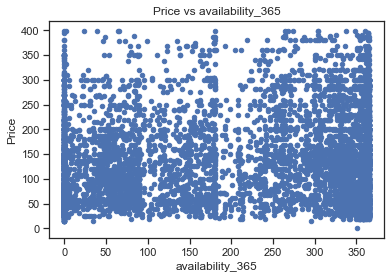

In [1098]:
# Price vs availability_365.

dfa_new.plot.scatter(x='availability_365',
                      y='price')
plt.xlabel('availability_365') 
plt.ylabel('Price')
plt.title('Price vs availability_365')

In [1099]:
# Correlation Value
column_1 = dfa_new['availability_365']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.10429334310854851


(viii) Price vs room_type

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Price vs room_type')

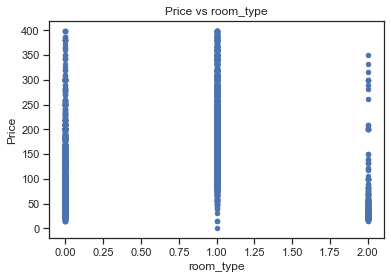

In [1100]:
# Price vs room_type.

dfa_new.plot.scatter(x='room_type',
                      y='price')
plt.xlabel('room_type') 
plt.ylabel('Price')
plt.title('Price vs room_type')

In [1101]:
# Correlation Value
column_1 = dfa_new['room_type']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.3600998122012198


Heat Map (Before drilling down)

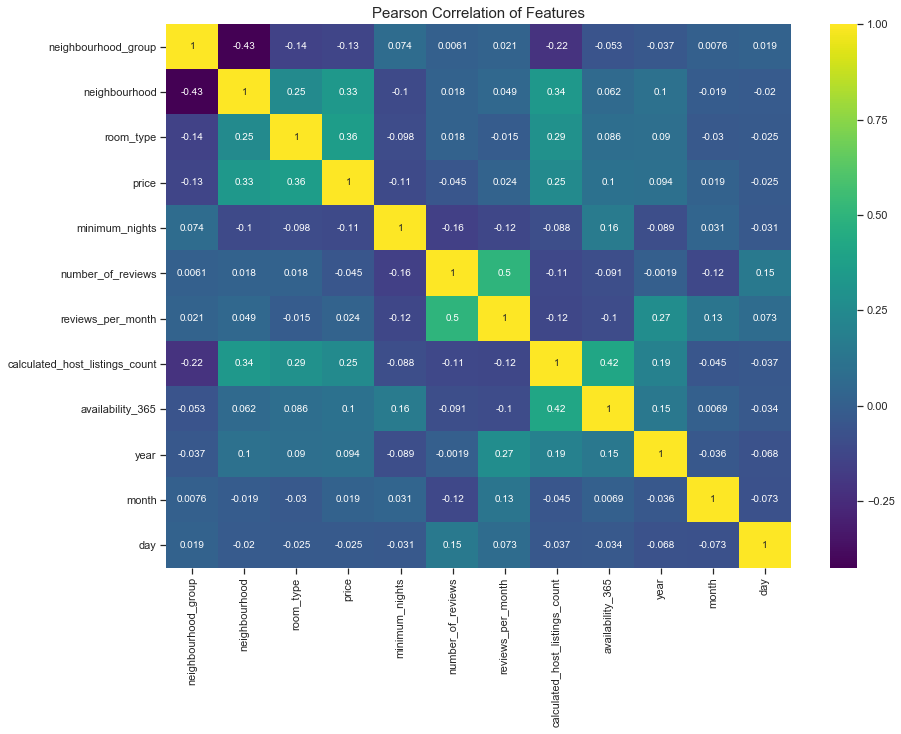

In [1102]:
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(dfa_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Scatter Matrix (Before drilling down)

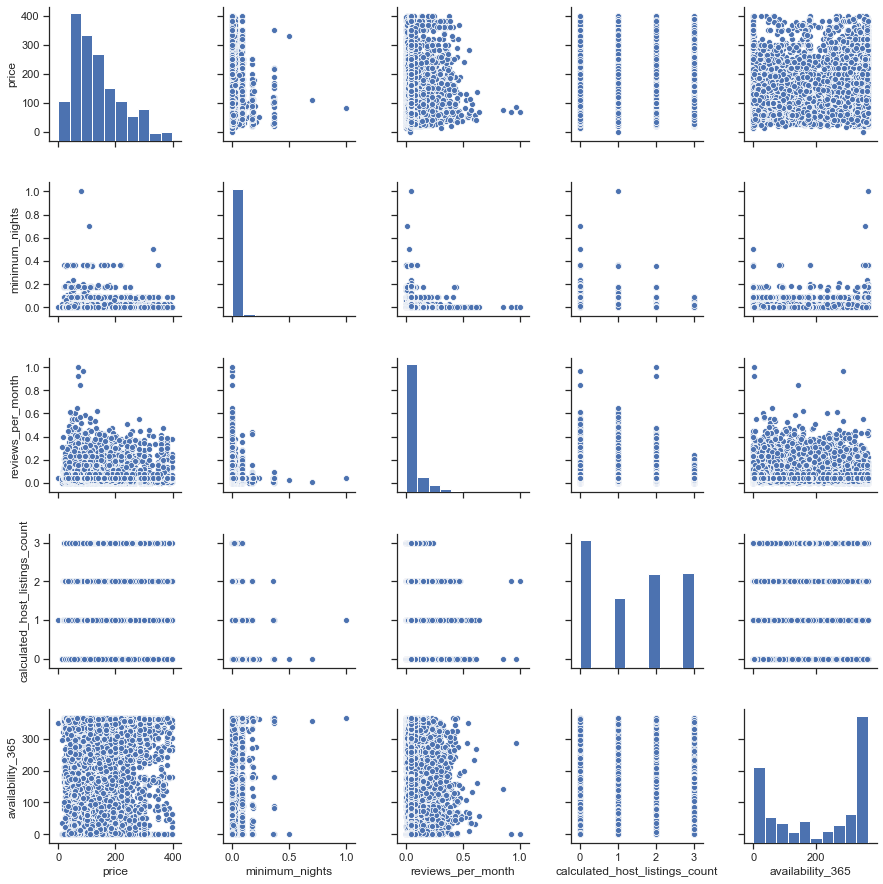

In [1103]:
# Before drilling down - scatter matrix
sns.set(style="ticks")
sns.pairplot(dfa_new[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])

### 2.4 Others

Focusing on room_type = 1 (entire apartment) and == 0 (private room)

In [1104]:
print("Private Room: " + str((len(dfa_new['room_type'][dfa_new['room_type'] == 0])/7565)*100))
print("Entire Home/Apartment: " + str((len(dfa_new['room_type'][dfa_new['room_type'] == 1])/7565)*100))
print("Shared Room: " + str((len(dfa_new['room_type'][dfa_new['room_type'] == 2])/7565)*100))

Private Room: 43.80700594844679
Entire Home/Apartment: 51.07732980832782
Shared Room: 5.11566424322538


In [1105]:
print("Total no. of rows (Before filtering): "+ str(len(dfa_new['room_type'])))
dfa_shared_room = dfa_new['room_type'][dfa_new['room_type'] == 2]
print("Total no. of rows (After filtering): "+ str(dfa_shared_room))

Total no. of rows (Before filtering): 7565
Total no. of rows (After filtering): 28      2
73      2
93      2
94      2
95      2
       ..
7693    2
7697    2
7698    2
7714    2
7740    2
Name: room_type, Length: 387, dtype: int32


In [1106]:
percentage_room_type_to_filter = (387/7565)*100
print("% of room_type to filter: " + str(percentage_room_type_to_filter))

% of room_type to filter: 5.11566424322538


In [1107]:
dfa_new = dfa_new[(dfa_new['room_type'] == 1) | (dfa_new['room_type'] == 0)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Price vs room_type')

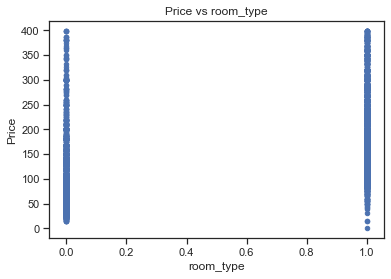

In [1108]:
# Price vs room_type.

dfa_new.plot.scatter(x='room_type',
                      y='price')
plt.xlabel('room_type') 
plt.ylabel('Price')
plt.title('Price vs room_type')

In [1109]:
# Correlation Value
column_1 = dfa_new['room_type']
column_2 = dfa_new['price']
correlation = column_1.corr(column_2, method='pearson')
print("Correlation value: "+ str(correlation))

Correlation value: 0.6080442537482788


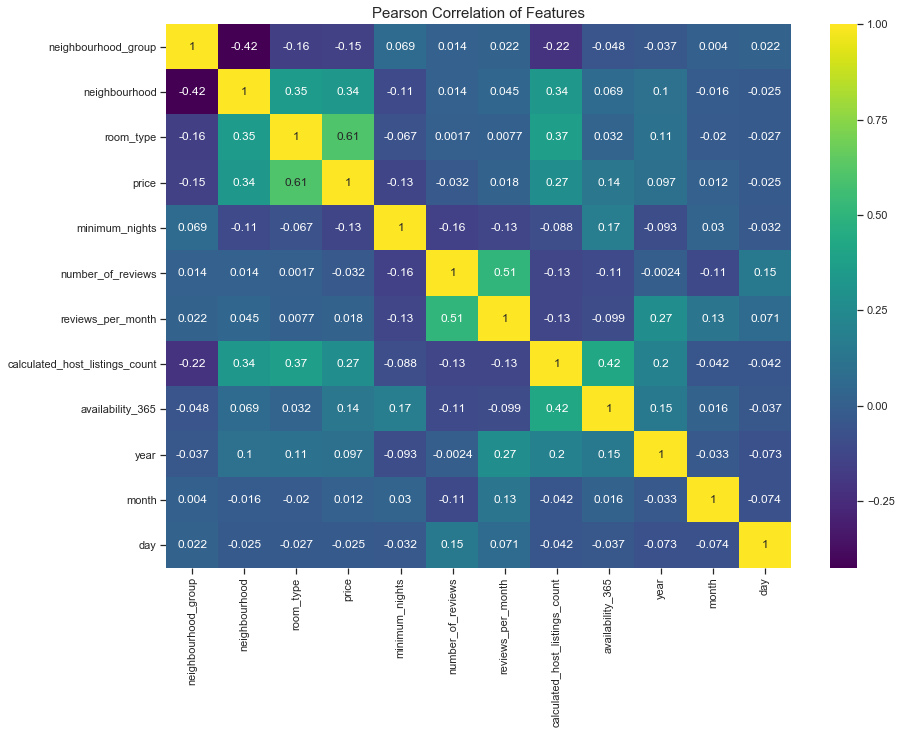

In [1110]:
# After focusing on room type
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(dfa_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

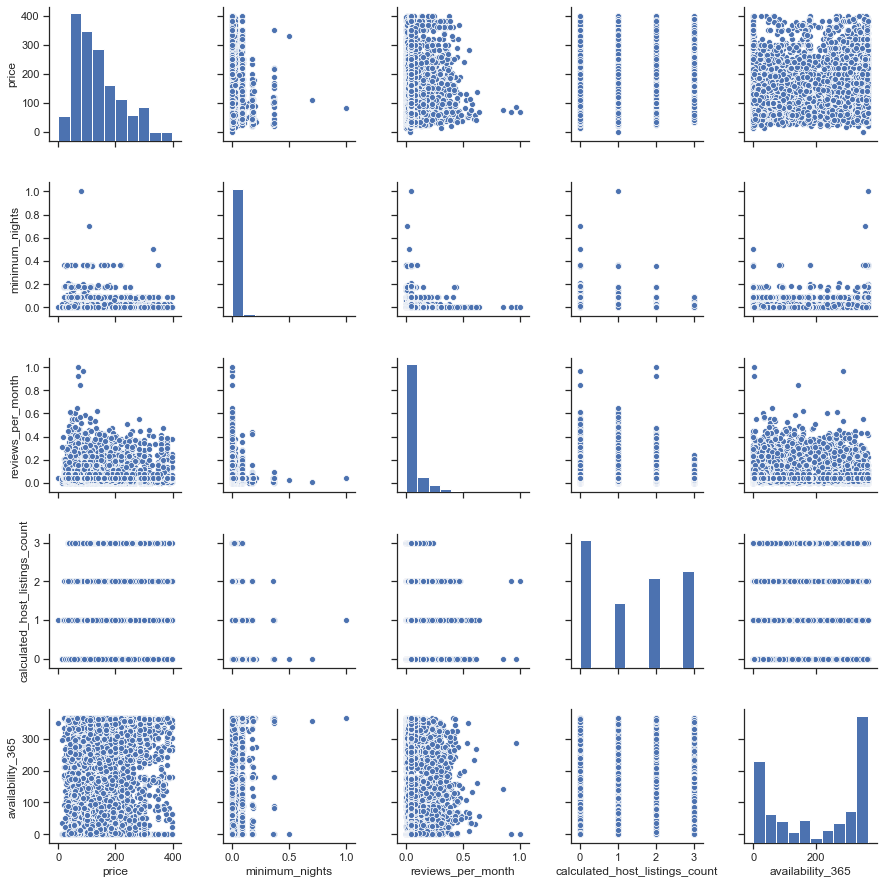

In [1111]:
# After focusing on room type - scatter matrix
sns.set(style="ticks")
sns.pairplot(dfa_new[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])

Focusing on Central and West regions of Neighbourhood Group

In [1112]:
print("West: " + str((len(dfa_new['neighbourhood_group'][dfa_new['neighbourhood_group'] == 0])/7178)*100))
print("Central: " + str((len(dfa_new['neighbourhood_group'][dfa_new['neighbourhood_group'] == 1])/7178)*100))
print("East: " + str((len(dfa_new['neighbourhood_group'][dfa_new['neighbourhood_group'] == 2])/7178)*100))
print("North: " + str((len(dfa_new['neighbourhood_group'][dfa_new['neighbourhood_group'] == 3])/7178)*100))
print("North-East: " + str((len(dfa_new['neighbourhood_group'][dfa_new['neighbourhood_group'] == 4])/7178)*100))

West: 7.16076901643912
Central: 78.93563666759543
East: 6.742825299526331
North: 2.5912510448592925
North-East: 4.569517971579827


In [1113]:
print(len(dfa_new['neighbourhood_group'][dfa_new['neighbourhood_group'] == 0]))

514


In [1114]:
print(len(dfa_new['neighbourhood_group'][dfa_new['neighbourhood_group'] == 1]))

5666


In [1115]:
percentage_neighbourhood_group_to_filter = ((514+5666)/7178)*100
print("% of neighbourhood_group to filter: " + str(percentage_neighbourhood_group_to_filter))

% of neighbourhood_group to filter: 86.09640568403455


In [1116]:
#dfa_new = dfa_new[(dfa_new['neighbourhood_group'] == 1) | (dfa_new['neighbourhood_group'] == 2) | (dfa_new['neighbourhood_group'] == 3) | (dfa_new['neighbourhood_group'] == 4)]

# West and Central region (the 2 highest frequencies)
dfa_new = dfa_new[(dfa_new['neighbourhood_group'] == 0) | (dfa_new['neighbourhood_group'] == 1)]

Text(0, 0.5, 'Price')

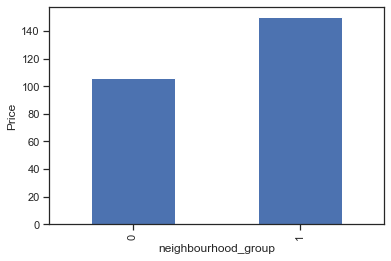

In [1117]:
# price vs. neighbourhood_group.

dfa_new.groupby('neighbourhood_group').price.mean().plot.bar() 
plt.ylabel('Price')

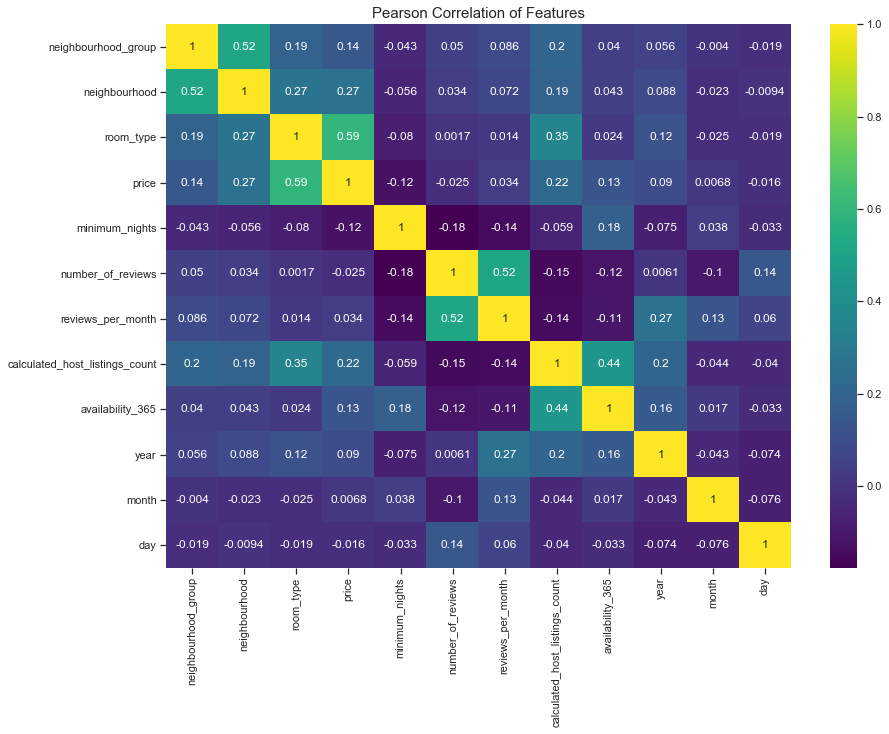

In [1118]:
# After filtering neighbourhood group 
# Heatmap: the correlation between any two features/variables
colormap = plt.cm.viridis
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(dfa_new.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

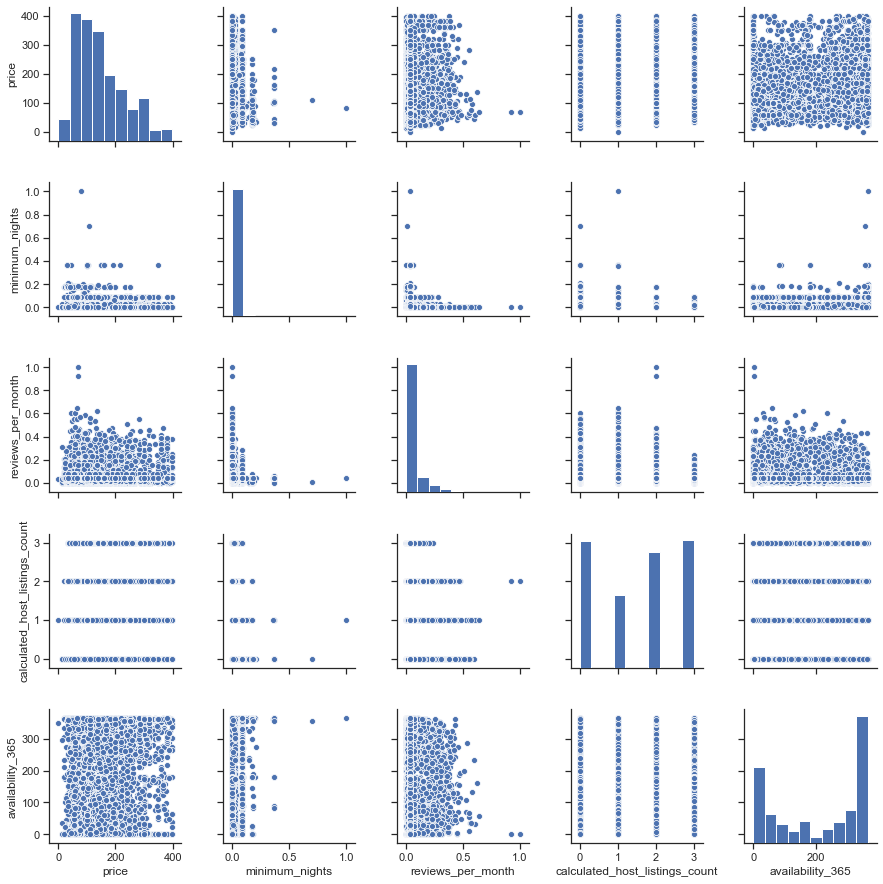

In [1119]:
# After focusing on neighbourhood group - scatter matrix
sns.set(style="ticks")
sns.pairplot(dfa_new[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])

In [1120]:
dfa_new.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
year                              0
month                             0
day                               0
dtype: int64

In [1121]:
dfa_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6180 entries, 1 to 7906
Data columns (total 12 columns):
neighbourhood_group               6180 non-null int32
neighbourhood                     6180 non-null int32
room_type                         6180 non-null int32
price                             6180 non-null int64
minimum_nights                    6180 non-null float64
number_of_reviews                 6180 non-null int32
reviews_per_month                 6180 non-null float64
calculated_host_listings_count    6180 non-null int32
availability_365                  6180 non-null int64
year                              6180 non-null int32
month                             6180 non-null int32
day                               6180 non-null int32
dtypes: float64(2), int32(8), int64(2)
memory usage: 594.5 KB


In [1122]:
print(dfa_new.describe())

       neighbourhood_group  neighbourhood    room_type        price  \
count          6180.000000    6180.000000  6180.000000  6180.000000   
mean              0.916828      28.089159     0.587217   146.357605   
std               0.276164       6.797250     0.492374    85.135989   
min               0.000000       0.000000     0.000000     0.000000   
25%               1.000000      25.000000     0.000000    79.000000   
50%               1.000000      28.000000     1.000000   131.000000   
75%               1.000000      31.000000     1.000000   199.000000   
max               1.000000      40.000000     1.000000   399.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     6180.000000        6180.000000        6180.000000   
mean         0.016040           1.153560           0.066867   
std          0.038390           1.265862           0.080731   
min          0.000000           0.000000           0.000770   
25%          0.001001           0.000000     

### 2.4 Export the data

In [1123]:
# Write prepared data to csv file
# Enter your code here:
dfa_new.to_csv('listings_new.csv', index=False)